In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import mitsuba as mi
sys.path.append('..')
from util import imshow_compare
mi.set_variant('scalar_rgb')

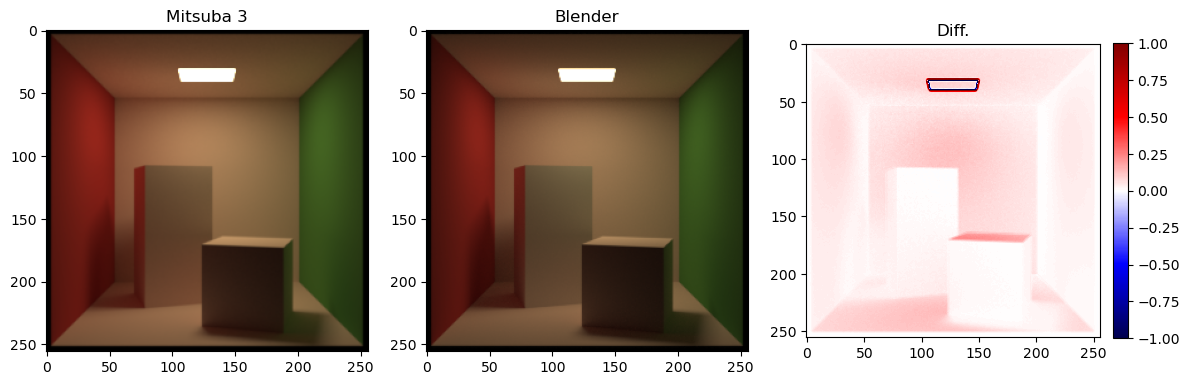

In [3]:
img_mi = mi.Bitmap("cbox_max8_rr5_spp4096.exr")
img_bd = mi.Bitmap(r"C:\Users\class\Dropbox\Academic\figures\cbox-blender\VTStandard_gauss1.5_depth8_spp4096.exr")
plt.close('all')
plt.figure(figsize=(12, 4))
imshow_compare(img_mi, np.array(img_bd)[:,:,:3], title_img="Mitsuba 3", title_ref="Blender", vabs=1.0)